In [3]:
import glob
import os 
import random
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

## Data path

In [4]:
annotations_p = '/home/michael/Downloads/20_Binary_Ceramic_Shapes/SegmentationClass/'
images_p = '/home/michael/Downloads/miningshapes_cleaned/preliminary/results/'

## Split Data in Training, Test and Validation

In [5]:
def create_image_list(base_path, basenames):
    z = []
    for img in classes:
        base = os.path.basename(img)
        z.append(os.path.join(images_p, base))
    return z 


In [6]:

classes = glob.glob(annotations_p+'*.png')
images = create_image_list(images_p, classes)

assert len(classes) == len(images)
#sort
classes.sort()
images.sort()

#shuffle
random.shuffle(images, lambda: .5)
random.shuffle(classes, lambda: .5)

#split data
train = images[:1370]
train_a = classes[:1370]
assert len(train) == len(train_a)

test = images[1370:1670]
test_a = classes[1370:1670]
assert len(test) == len(test_a)

val = images[1670:]
val_a = classes[1670:]
assert len(val) == len(val_a)

#assert correct splitting
assert len(np.unique([os.path.basename(train[i]) == os.path.basename(train_a[i]) for i in range(len(val_a))])) == 1 
assert len(np.unique([os.path.basename(test[i]) == os.path.basename(test_a[i]) for i in range(len(val_a))])) == 1 
assert len(np.unique([os.path.basename(val[i]) == os.path.basename(val_a[i]) for i in range(len(val_a))])) == 1 


## Copy images in destination path

In [7]:
# Set base path
base = '/home/michael/Desktop/Ceramic_dataset/'

In [8]:
def copy_images_to_path(images, dst_path):
    for image in images:
        u = image
        %cp $u $dst_path

In [9]:
def copy_annotations_to_path(images_names, dst_path):
    for image in images_names:
        img_data = convert_annotation_to_labelmap(image)
        save_dir = os.path.join(dst_path,os.path.basename(image))
        cv.imwrite(save_dir,img_data)




In [10]:
def convert_annotation_to_labelmap(image_path, color = (0,0,128)):
    img = cv.imread(image_path, cv.IMREAD_COLOR)
    img_temp = np.zeros(shape=(img.shape[0],img.shape[1]))
    img_temp[np.where((img == color).all(axis = 2))] = 1
    return img_temp

In [38]:
val_p = base + 'val/'
train_p = base + 'train/'
test_p = base + 'test/'

copy_images_to_path(val, val_p)
copy_images_to_path(test, test_p)
copy_images_to_path(train, train_p)

In [54]:
val_annot_p = base + 'valannot/'
train_annot_p = base + 'trainannot/'
test_annot_p = base + 'testannot/'

copy_annotations_to_path(val_a, val_annot_p)
copy_annotations_to_path(train_a, train_annot_p)
copy_annotations_to_path(test_a, test_annot_p)

In [11]:
img = cv.imread(val_a[0], cv.IMREAD_GRAYSCALE)

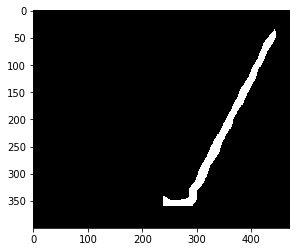

In [12]:
plt.imshow(img,cmap='gray')

In [18]:
np.unique(img)

array([ 0, 38], dtype=uint8)

In [23]:
np.argwhere(img == 38)

array([[ 34, 443],
       [ 35, 442],
       [ 35, 443],
       ...,
       [359, 289],
       [359, 290],
       [359, 291]])

In [15]:
np.unique(img)
mask = np.zeros(shape=(*(img.shape),len(np.unique(img))))

In [29]:
#mask[:,:,0] = np.logical_not(np.logical_or(mask[:,:,0],img))
#mask[:,:,1] = np.logical_or(mask[:,:,1],img)
mask[:,:,0] = (img == 0)
mask[:,:,1] = (img == 38)

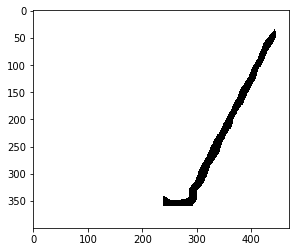

In [31]:
plt.imshow(mask[:,:,0],cmap='gray')

In [24]:
a = np.array([[0,0,0,0,38], [0,0,0,0,38], [0,0,0,0,38], [0,0,0,38,38], [0,0,0,38,38]])
b = np.zeros_like(a)

In [25]:
np.logical_not(np.logical_or(a,b))

array([[ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True,  True, False],
       [ True,  True,  True, False, False],
       [ True,  True,  True, False, False]])

In [27]:
np.logical_or(a,b)

array([[False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True]])

In [26]:
a == 38

array([[False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False, False,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True]])